In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt

import numpy as np
import math
import time
import copy
import pdb

In [2]:
# this is one way to define a network
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_hidden1, n_hidden2, n_output):
        super(Net, self).__init__()
        self.hidden  = nn.Linear(n_feature, n_hidden, bias=True)
#         self.hidden1 = nn.Linear(n_hidden, n_hidden1, bias=True)   # hidden layer
#         self.hidden2 = nn.Linear(n_hidden1, n_hidden2, bias=True)   # hidden layer
#         self.predict = nn.Linear(n_hidden2, n_output, bias=True)   # output layer
        self.predict = nn.Linear(n_hidden, n_output, bias=True)   # output layer

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))    # activation function for hidden layer
#         x = torch.sigmoid(self.hidden1(x))
#         x = torch.sigmoid(self.hidden2(x))
        x = torch.sigmoid(self.predict(x))

        return x

net = Net(n_feature=3, n_hidden=2, n_hidden1=25, n_hidden2=5, n_output=1)     # define the network
print(net)  # net architecture


Net(
  (hidden): Linear(in_features=3, out_features=2, bias=True)
  (predict): Linear(in_features=2, out_features=1, bias=True)
)


In [3]:
class AdNN(object):
    def __init__ (self):
        self.zeta    = 0.00001
        self.dt      = 0.1
        self.un      = 0.0
        self.err     = 0.0
        self.err_1   = 0.0
        self.err_2   = 0.0
        self.loss    = torch.tensor([0.0])
        self.uNN     = 0.0
        self.u       = 0.0
        self.uMin    = -10
        self.uMax    = 10
        
    def calculateError(self,yr,yout):
        self.err_2  = self.err_1
        self.err_1  = self.err
        self.err    = 1.0*(yr-yout)

        return self.err
        
    def process(self):
        Xe = np.array([self.err,self.err_1,self.err_2])
        Xe = torch.from_numpy(Xe.T)
        Xe = torch.tensor(Xe,dtype=torch.float)

        self.uNN     = net(Xe)
        self.un      = (self.uNN.data.numpy()).item()
        self.u       = self.un * (self.uMax-self.uMin) + self.uMin

        return self.u
        
    def learn(self,alpha):
        self.zeta = alpha + alpha*np.abs(self.err)
        self.uNN.backward(torch.ones_like(self.uNN))

#         dW1 = net.hidden.weight.data  + self.zeta * self.err * net.hidden.weight.grad - 0.00000125*net.hidden.weight.data
#         dW2 = net.hidden1.weight.data + self.zeta * self.err * net.hidden1.weight.grad - 0.00000125*net.hidden1.weight.grad
#         dW3 = net.hidden2.weight.data + self.zeta * self.err * net.hidden2.weight.grad - 0.00000125*net.hidden2.weight.grad
#         dW4 = net.predict.weight.data + self.zeta * self.err * net.predict.weight.grad - 0.00000125*net.predict.weight.grad
        
        dW1 = net.hidden.weight.data  + self.zeta * self.err * net.hidden.weight.grad
#         dW2 = net.hidden1.weight.data + self.zeta * self.err * net.hidden1.weight.grad
#         dW3 = net.hidden2.weight.data + self.zeta * self.err * net.hidden2.weight.grad
        dW4 = net.predict.weight.data + self.zeta * self.err * net.predict.weight.grad
        
        net.hidden.weight.data  = dW1.clone().detach().requires_grad_(True)
#         net.hidden1.weight.data = dW2.clone().detach().requires_grad_(True)
#         net.hidden2.weight.data = dW3.clone().detach().requires_grad_(True)
        net.predict.weight.data = dW4.clone().detach().requires_grad_(True)

In [4]:
def plotGraph(tm,y,yr,er,uc,unn):

    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    plt.plot(tm,yr,label='reference')
    plt.plot(tm,y,label='response')
    plt.title('Respon')
    plt.xlabel('time')
    plt.ylabel('height (m)')
    plt.xlabel('time')
    plt.grid(True)
    
    plt.subplot(2,2,2)
    plt.plot(tm,er)
    plt.title('Error')
    plt.grid(True)
    
    plt.subplot(2,2,3)
#     plt.plot(tm,uc,label='SMC')
#     plt.title('control signal')
    plt.plot(tm,unn,label='NN')
    plt.xlabel('time')
    plt.ylabel('control signal')
    plt.grid(True)
    plt.legend()
    plt.show()

time = 0.01
time = 0.02
time = 0.03
time = 0.04
time = 0.05
time = 0.06
time = 0.07
time = 0.08
time = 0.09
time = 0.1
time = 0.11
time = 0.12
time = 0.13
time = 0.14
time = 0.15
time = 0.16
time = 0.17
time = 0.18
time = 0.19
time = 0.2
time = 0.21
time = 0.22
time = 0.23
time = 0.24
time = 0.25
time = 0.26
time = 0.27
time = 0.28
time = 0.29
time = 0.3
time = 0.31
time = 0.32
time = 0.33
time = 0.34
time = 0.35000000000000003
time = 0.36
time = 0.37
time = 0.38
time = 0.39
time = 0.4
time = 0.41000000000000003
time = 0.42
time = 0.43
time = 0.44
time = 0.45
time = 0.46
time = 0.47000000000000003
time = 0.48
time = 0.49
time = 0.5
time = 0.51
time = 0.52
time = 0.53
time = 0.54
time = 0.55
time = 0.56
time = 0.5700000000000001
time = 0.58
time = 0.59
time = 0.6
time = 0.61
time = 0.62
time = 0.63
time = 0.64
time = 0.65
time = 0.66
time = 0.67
time = 0.68
time = 0.6900000000000001
time = 0.7000000000000001
time = 0.71
time = 0.72
time = 0.73
time = 0.74
time = 0.75
time = 0.76
time = 

<ipython-input-3-5430faf49ed4>:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Xe = torch.tensor(Xe,dtype=torch.float)


Output streaming akan dipotong hingga 5000 baris terakhir.
time = 450.01
time = 450.02
time = 450.03000000000003
time = 450.04
time = 450.05
time = 450.06
time = 450.07
time = 450.08
time = 450.09000000000003
time = 450.1
time = 450.11
time = 450.12
time = 450.13
time = 450.14
time = 450.15000000000003
time = 450.16
time = 450.17
time = 450.18
time = 450.19
time = 450.2
time = 450.21000000000004
time = 450.22
time = 450.23
time = 450.24
time = 450.25
time = 450.26
time = 450.27
time = 450.28000000000003
time = 450.29
time = 450.3
time = 450.31
time = 450.32
time = 450.33
time = 450.34000000000003
time = 450.35
time = 450.36
time = 450.37
time = 450.38
time = 450.39
time = 450.40000000000003
time = 450.41
time = 450.42
time = 450.43
time = 450.44
time = 450.45
time = 450.46000000000004
time = 450.47
time = 450.48
time = 450.49
time = 450.5
time = 450.51
time = 450.52
time = 450.53000000000003
time = 450.54
time = 450.55
time = 450.56
time = 450.57
time = 450.58
time = 450.59000000000003

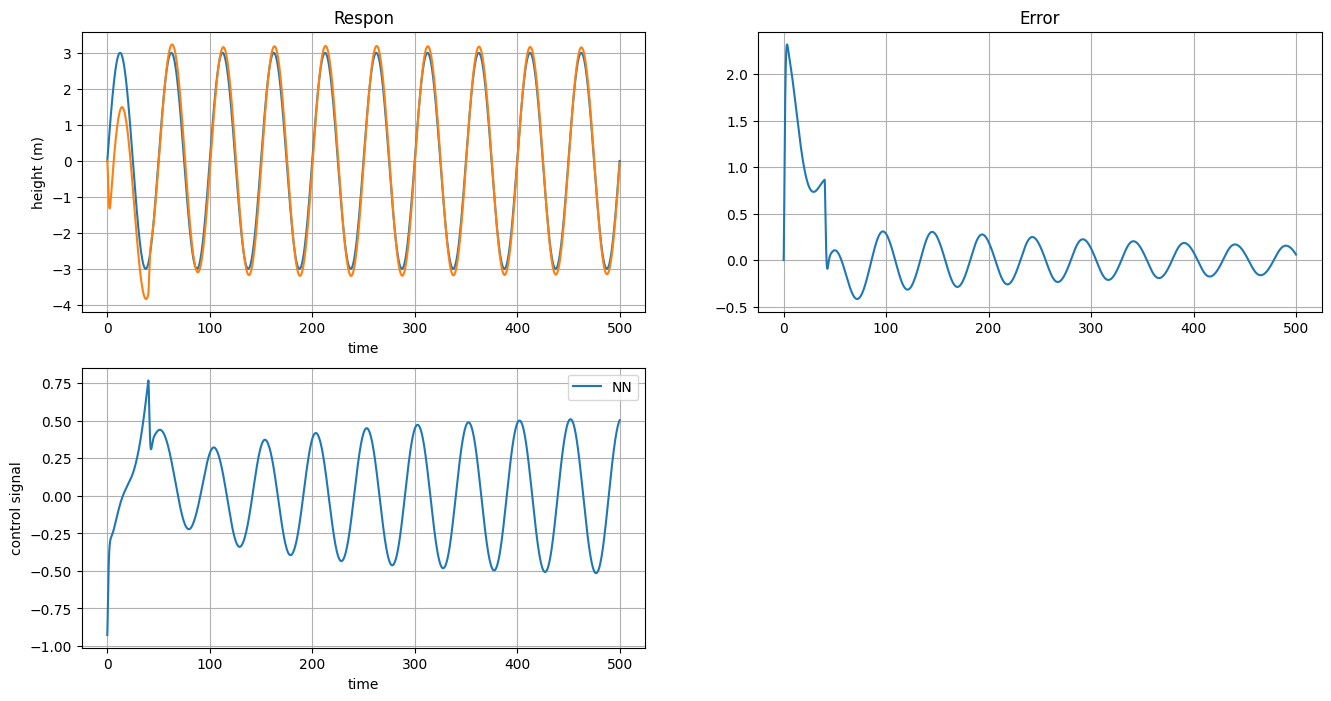

[[0.41654498]]


In [5]:
#initial conditions
x   = 0.0
x_1 = 0.0
x_2 = 0.0
y_1 = 0.0
y_2 = 0.0
yi  = 0.0
dt  = 0.01
u   = 0.0

sim_time = 500
cnt = int(sim_time/dt)
tim = np.arange(0.,sim_time,dt)

ypp    = []
tim    = []
erracc = []
uacc   = []
usrcacc= []
unnacc = []
yr     = 1.0
yracc  = []
y      = 0.0
NN_con = AdNN()
NN_con.dt = dt
learnRate = 0.00001*dt

#Main Loop

for i in range(cnt):
    
    if i*dt > 40:
        dist = 0.0
    else:
        dist = -0.02
    
    yr  = 0.0 + 3*np.sin(2*math.pi*(i*dt)/50)
#     if yr>0:
#         yr = 3
#     elif yr<0:
#         yr = 0
#     else:
#         yr = 0

    x_2 = x_1
    x_1 = x
    x   = u
    y_2 = y_1
    y_1 = y
    y   = 0.9802*y_1+0.01386*x_1 + dist
#     y = 1.783*y_1 - 0.8187*y_2 + 0.01307*x_1 + 0.01222*x_2 + dist
#     y = 1.519*y_1 - 0.5488*y_2 + 0.01154*x_1 + 0.009448*x_2 + 1*dist
    
    yi += y*dt
    
    #controller calculation
    err = NN_con.calculateError(yr,yi)
    un  = NN_con.process()
    u   = err + un

#     if i % 5 == 0:
    NN_con.learn(learnRate)
    
    ypp.append(yi)
    tim.append(i*dt)
    erracc.append(err)
    unnacc.append(un)
    yracc.append(yr)

    print ('time =',(i+1)*dt)

plotGraph(tim,ypp,yracc,erracc,uacc,unnacc)

err_mat = np.matrix(erracc)
sumerr2 = err_mat*err_mat.T
RMSE    = np.sqrt(sumerr2/np.size(err_mat))
print(RMSE)